<a href="https://colab.research.google.com/github/ramirezzzluisss/IS4487/blob/main/Week13Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [3]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import confusion_matrix


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/adviseinvest.csv')

df_customer = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/customer_data.csv')

Mounted at /content/gdrive


In [6]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [7]:
df_customer.head(10)

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927
5,17430,0,34,1,1,0,1,0,3,1,2,0,M6161
6,53020,0,36,3,1,0,0,1,0,0,4,0,U4472
7,27820,0,31,3,1,0,1,1,3,2,3,0,H557
8,7070,0,30,2,1,0,1,0,3,0,2,0,B54
9,14120,0,29,3,1,0,1,0,3,0,2,0,L2217


In [8]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [9]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          1000 non-null   int64 
 1   female          1000 non-null   int64 
 2   age             1000 non-null   int64 
 3   job             1000 non-null   int64 
 4   num_dependents  1000 non-null   int64 
 5   rent            1000 non-null   int64 
 6   own_res         1000 non-null   int64 
 7   new_car         1000 non-null   int64 
 8   chk_acct        1000 non-null   int64 
 9   sav_acct        1000 non-null   int64 
 10  num_accts       1000 non-null   int64 
 11  mobile          1000 non-null   int64 
 12  customer_id     1000 non-null   object
dtypes: int64(12), object(1)
memory usage: 101.7+ KB


In [10]:
#describe the data before cleaning it
df.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [11]:
df_customer.describe()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34033.260000,0.050000,35.01400,1.947000,1.13900,0.213000,0.68300,0.227000,1.486000,1.018000,2.406000,0.103000
std,29474.002504,0.218054,11.40473,0.663801,0.34612,0.409633,0.46554,0.419102,1.229356,1.527747,1.188519,0.304111
min,2760.000000,0.000000,19.00000,0.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13505.000000,0.000000,26.00000,2.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,23660.000000,0.000000,32.00000,2.000000,1.00000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,42970.000000,0.000000,41.00000,2.000000,1.00000,0.000000,1.00000,0.000000,3.000000,2.000000,4.000000,0.000000
max,159450.000000,1.000000,74.00000,3.000000,2.00000,1.000000,1.00000,1.000000,3.000000,4.000000,4.000000,1.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [12]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['num_accts'] > 0) & (df['num_accts'] < 10)]

#remove rows with negative income values
df_clean = df_clean[(df_clean['income'] > 0)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna() 

#remove the product variable
df_clean = df_clean.drop(['product'], axis=1)

df_clean.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile
count,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000
mean,0.556800,33274.276805,0.055622,34.492839,1.918815,1.143878,0.215816,0.682077,0.236666,1.477755,0.967149,2.508104,0.085826
std,0.496772,28741.242453,0.229195,11.095177,0.586342,0.350972,0.411395,0.465678,0.425043,1.238905,1.490369,1.063864,0.280112
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,13640.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,23230.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,40200.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        27579 non-null  int64  
 1   income          27579 non-null  int64  
 2   female          27579 non-null  int64  
 3   age             27579 non-null  int64  
 4   job             27579 non-null  int64  
 5   num_dependents  27579 non-null  int64  
 6   rent            27579 non-null  int64  
 7   own_res         27579 non-null  int64  
 8   new_car         27579 non-null  float64
 9   chk_acct        27579 non-null  int64  
 10  sav_acct        27579 non-null  int64  
 11  num_accts       27579 non-null  int64  
 12  mobile          27579 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.9 MB


# Convert categories to factors
- answered
- female
- rent
- owns res
- new car 
- mobile

In [14]:
#new_clear from float to int

# df_clean['new_car'] = df_clean['new_car'].astype('int')

df_clean['female'] = df_clean['female'].astype('category')
df_clean['rent'] = df_clean['rent'].astype('category')
df_clean['own_res'] = df_clean['own_res'].astype('category')
df_clean['new_car'] = df_clean['new_car'].astype('category')
df_clean['mobile'] = df_clean['mobile'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        27579 non-null  int64   
 1   income          27579 non-null  int64   
 2   female          27579 non-null  category
 3   age             27579 non-null  int64   
 4   job             27579 non-null  int64   
 5   num_dependents  27579 non-null  int64   
 6   rent            27579 non-null  category
 7   own_res         27579 non-null  category
 8   new_car         27579 non-null  category
 9   chk_acct        27579 non-null  int64   
 10  sav_acct        27579 non-null  int64   
 11  num_accts       27579 non-null  int64   
 12  mobile          27579 non-null  category
dtypes: category(5), int64(8)
memory usage: 2.0 MB


## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [15]:
#Find the mean value
df_clean['answered'].mean()

#Answer to question 2

0.5568004641212517

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [16]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income']]
y = df_clean['answered']

income_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
income_tree = income_tree.fit(x,y)


## Preview the tree


In [17]:
income_tree_text = tree.export_text(income_tree)
print(income_tree_text)

|--- feature_0 <= 63270.00
|   |--- feature_0 <= 39135.00
|   |   |--- feature_0 <= 35625.00
|   |   |   |--- feature_0 <= 4295.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  4295.00
|   |   |   |   |--- feature_0 <= 9595.00
|   |   |   |   |   |--- feature_0 <= 7890.00
|   |   |   |   |   |   |--- feature_0 <= 6990.00
|   |   |   |   |   |   |   |--- feature_0 <= 6255.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 4455.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  4455.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 5900.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  5900.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 6135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  6135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |

## Check Accuracy

What is the accuracy of the answered_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [18]:
pred = income_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.99535878748323


## Prune the tree

Limit the number of levels to 2

In [19]:
income_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
income_tree2 = income_tree2.fit(x,y)


## Preview the new tree

In [20]:
income_tree2_text = tree.export_text(income_tree2)
print(income_tree2_text)

|--- feature_0 <= 111910.00
|   |--- class: 1
|--- feature_0 >  111910.00
|   |--- class: 0



## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [21]:
pred = income_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.5869683454802567


## Visualize the model

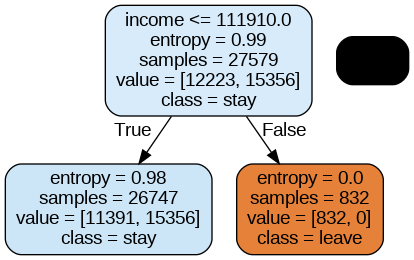

In [22]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(income_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
# question 4

# entropy(parent): entropy in the parent, prior to the split. Hint:  This is node 1).
parent_entropy = 0.99

# entropy(c1): entropy in the first child.
first_entropy = 0.98
# p(c1): the proportion of observations from the parent that wind up in the first child after the split.
first_proportion = 26747 / 27579

# entropy(c2): entropy in the second child.
second_entropy = 0.0
# p(c2): the proportion of observations from the parent that wind up in the second child after the split.
second_proportion = 832 / 27579

# IG = entropy(parent) - [p(c1) * entropy(c1) + p(c2) * entropy(c2)]

IG = parent_entropy - (first_proportion * first_entropy + second_proportion * second_entropy)

print(IG)

0.03956452373182495


## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree." 

What is the accuracy of the full tree? 

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 29503
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        27579 non-null  int64   
 1   income          27579 non-null  int64   
 2   female          27579 non-null  category
 3   age             27579 non-null  int64   
 4   job             27579 non-null  int64   
 5   num_dependents  27579 non-null  int64   
 6   rent            27579 non-null  category
 7   own_res         27579 non-null  category
 8   new_car         27579 non-null  category
 9   chk_acct        27579 non-null  int64   
 10  sav_acct        27579 non-null  int64   
 11  num_accts       27579 non-null  int64   
 12  mobile          27579 non-null  category
dtypes: category(5), int64(8)
memory usage: 2.0 MB


In [62]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','female','age','job','num_dependents','rent','own_res','new_car','chk_acct','sav_acct','num_accts','mobile']]
y = df_clean['answered']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

#create decision tree classifer
full_tree = full_tree.fit(x_train,y_train)

# use the tree to predict "answered"
y_predict2 = (full_tree.predict_proba(x_test)[:,1] >= 0.3 )


# create a confusion matrix
fullTree_matrix = confusion_matrix(y_test, y_predict2)
print(fullTree_matrix)



# # Create Decision Tree Classifer
# full_tree = full_tree.fit(x_train, y_train)


[[ 256 2167]
 [   0 3093]]


In [63]:
# question 1 for week 13 assignment

# assign true and false positives and negatives
full_truePositive = fullTree_matrix[1,1]
full_falsePositive = fullTree_matrix[0,1]
full_trueNegative = fullTree_matrix[0,0]
full_falseNegative = fullTree_matrix[1,0]
print("True Positives are:", full_truePositive)
print("False Positives are:", full_falsePositive)
print("True Negatives are:", full_trueNegative)
print("False Negatives are:", full_falseNegative)

# cost benefit
full_profit = (75 * full_truePositive) - (25 * full_falsePositive)

print("")

print("${:,.2f}".format(full_profit))

True Positives are: 3093
False Positives are: 2167
True Negatives are: 256
False Negatives are: 0

$177,800.00


In [64]:
# label x for customer dataset 
x_customer = df_customer[['income','female','age','job','num_dependents','rent','own_res','new_car','chk_acct','sav_acct','num_accts','mobile']]

# question 2 on week 13 assignment

# predict answered variable
df_customer['answered'] = (full_tree.predict_proba(x_customer)[:,1] >= 0.3 )

# filter dataframe for customer who were predicted to answer
df_customerTrue = df_customer[df_customer['answered'] == True]

df_customerTrue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          949 non-null    int64 
 1   female          949 non-null    int64 
 2   age             949 non-null    int64 
 3   job             949 non-null    int64 
 4   num_dependents  949 non-null    int64 
 5   rent            949 non-null    int64 
 6   own_res         949 non-null    int64 
 7   new_car         949 non-null    int64 
 8   chk_acct        949 non-null    int64 
 9   sav_acct        949 non-null    int64 
 10  num_accts       949 non-null    int64 
 11  mobile          949 non-null    int64 
 12  customer_id     949 non-null    object
 13  answered        949 non-null    bool  
dtypes: bool(1), int64(12), object(1)
memory usage: 104.7+ KB


##Visualize the full tree

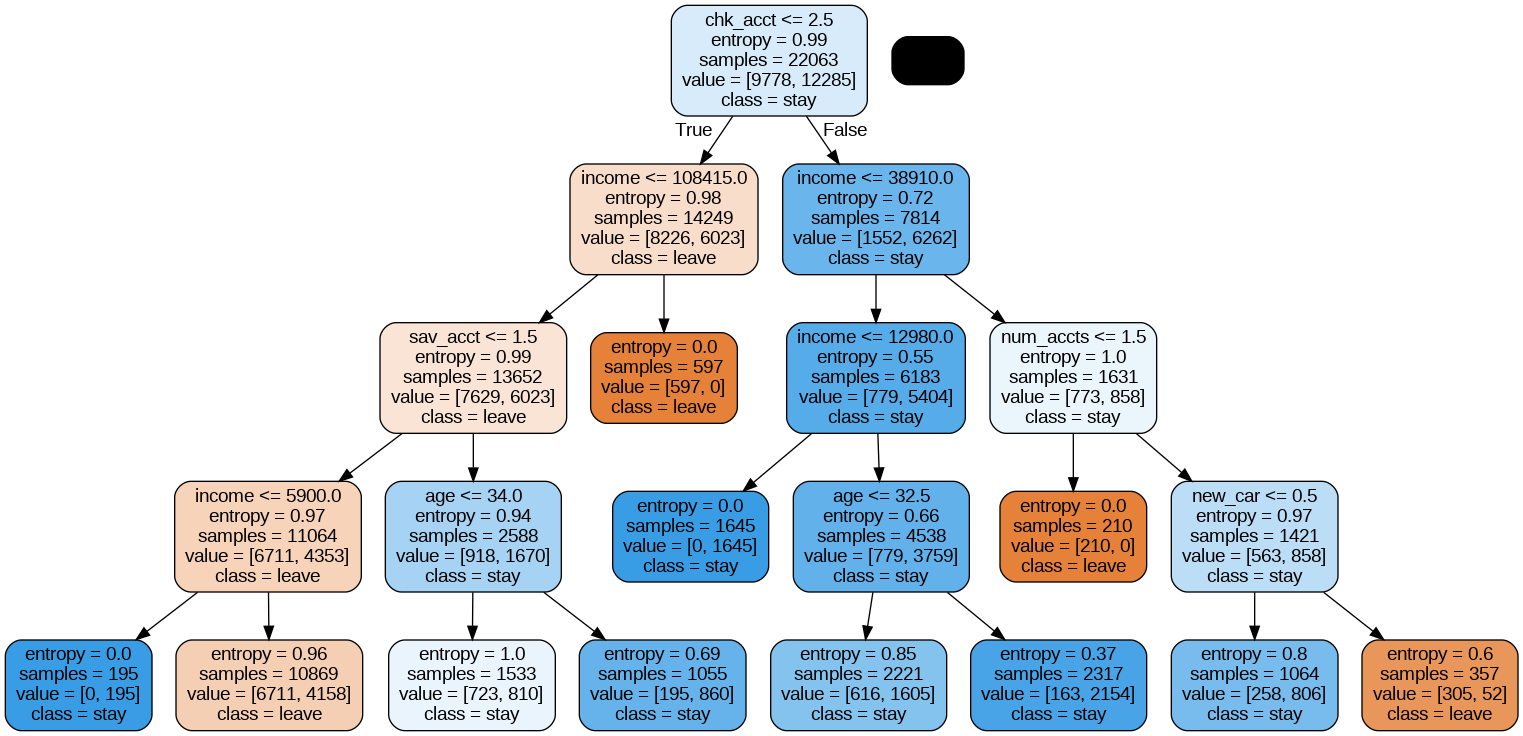

In [41]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns,class_names=['leave','stay'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [42]:
pred = full_tree.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.7215272489937996


## Fit a basic tree model
use all available attributes

In [43]:
adviseinvest_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
adviseinvest_tree = adviseinvest_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = adviseinvest_tree.predict(x_test)

## What is the accuracy?

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7253444525018129


## Create Confusion Matrix
This will show false positives, true positives, etc.

In [45]:
# create a confusion matrix
adviseinvest_tree_matrix = confusion_matrix(y_test, y_predict)
print(adviseinvest_tree_matrix)

[[1968  477]
 [1038 2033]]


## Plot the confusion matrix
We will use a Seaborn library for this

[Text(0, 0.5, 'Not Answered'), Text(0, 1.5, 'Answered')]

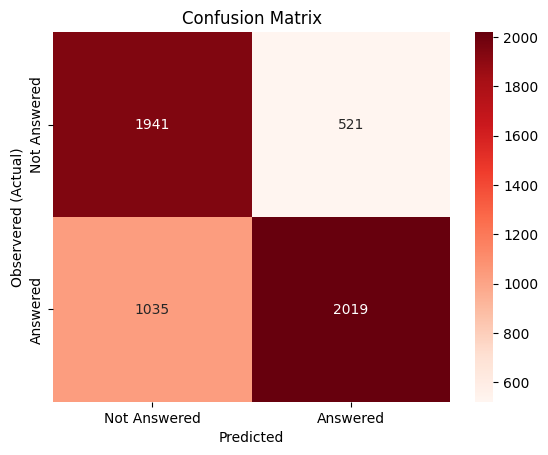

In [30]:
cm = sns.heatmap(adviseinvest_tree_matrix, annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Not Answered','Answered'])
cm.yaxis.set_ticklabels(['Not Answered','Answered'])

## Calculate Profit

In [31]:
truePositive = adviseinvest_tree_matrix[1,1]
falsePositive = adviseinvest_tree_matrix[0,1]
trueNegative = adviseinvest_tree_matrix[0,0]
falseNegative = adviseinvest_tree_matrix[1,0]
print("True Positives are:", truePositive)
print("False Positives are:", falsePositive)
print("True Negatives are:", trueNegative)
print("False Negatives are:", falseNegative)

True Positives are: 2019
False Positives are: 521
True Negatives are: 1941
False Negatives are: 1035


In [32]:
# cost benefit
profit = (75 * truePositive) - (25 * falsePositive)

print("${:,.2f}".format(profit))

$138,400.00


In [33]:
# baseline
base = (75 * (truePositive + falseNegative)) - (25 * (falsePositive + trueNegative))

print("${:,.2f}".format(base))

$167,500.00
